#Objective:-
The primary objective of this project is to develop an advanced emotion_detector classification model that addresses that challenges effectively and efficiently. The model should leverage state-of-the-art machine learning and natural language processing techniques to achieve high accuracy in classifying emotions while minimizing false positives and negatives. Additionally, the model should be capable of handling multilingual and multimodal content, ensuring a versatile and adaptable solution for diverse user bases.

The success of this project will contribute to enhancing the user experience on communication platforms.

# Importing Libraries

In [ ]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
%matplotlib inline
import seaborn as sns   #importing seaborn

# Loading data

In [ ]:
data=pd.read_csv("/content/Emotion_classify_Data.csv")

In [ ]:
#shape of data
data.shape

(5937, 2)

- **observation**- Dataset contains 5937 rows and 2 columns

In [ ]:
#top 5 rows of dataset
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
#checking for null values in features
data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

- **observation**- There is no null value in dataset

# EDA

In [ ]:
# encoding target column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Emotion"]=encoder.fit_transform(data["Emotion"])

- **Observation:**- classes are encoded in this form:- if Emotion=0 means "anger",if Emotion=1 means "fear",if Emotion=2 means "joy" .




In [ ]:
#checking for duplicate data
data.duplicated().sum()

0

#pie chart distribution

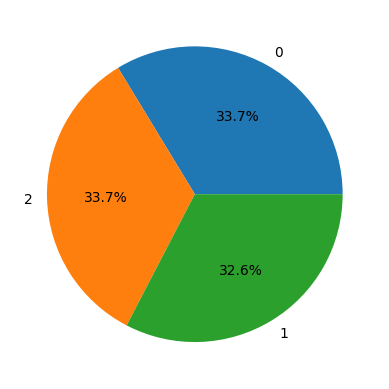

In [ ]:
pie_labels=data["Emotion"].value_counts().index #index of feature "emotion"
pie_values=data["Emotion"].value_counts().values    #values for classes
plt.pie(pie_values,labels=pie_labels,autopct="%1.1f%%") #pie plot
plt.show()

- **observation**- the data is balanced.

# NLP

- Importing nltk

- Punkt Sentence Tokenizer

punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [ ]:
import nltk #importing nltk

In [ ]:
#downloading nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Data Preprocessing
- lower case
- tokenization
- removing stopword and punctuation
- stemming

In [ ]:
#downloading stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#importing english stopwords
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# test
#importing nltk.stem to stemming the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
stemmer.stem("playing")  #testing if it is working

'play'

- Function to preprocess data

In [ ]:
def transformed_text(Comment):
    # Convert text to lowercase
    Comment = Comment.lower()

    # Tokenize the text
    words = nltk.word_tokenize(Comment)

    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()

    # Removing English stopwords and applying stemming while ignoring special symbols
    filtered_words = [stemmer.stem(word) for word in words if word not in stopwords.words('english') and word.isalnum()]

    # Join the filtered words back into a single string
    transformed_text = ' '.join(filtered_words)

    return transformed_text


#adding a new preprocessed column

In [ ]:
data["final_data"]=data["Comment"].apply(transformed_text)

In [ ]:
data.head()

,Comment,Emotion,final_data
0,i seriously hate one subject to death but now ...,1,serious hate one subject death feel reluct drop
1,im so full of life i feel appalled,0,im full life feel appal
2,i sit here to write i start to dig out my feel...,1,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,2,ive realli angri r feel like idiot trust first...
4,i feel suspicious if there is no one outside l...,1,feel suspici one outsid like raptur happen someth


In [ ]:
!pip install wordCloud

- initializing word cloud

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

- wordcloud for anger emotion

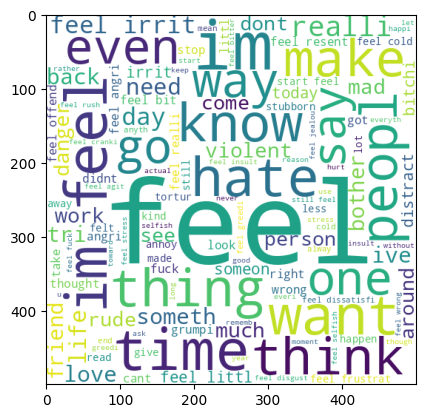

In [ ]:
anger_wc=wc.generate(data[data["Emotion"]==0]["final_data"].str.cat(sep=" "))
plt.imshow(anger_wc)

- wordcloud for fear emotion

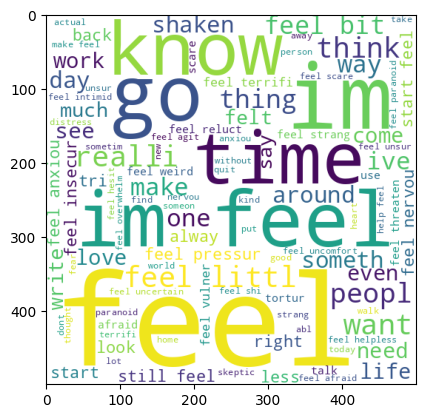

In [ ]:
fear_wc=wc.generate(data[data["Emotion"]==1]["final_data"].str.cat(sep=" "))
plt.imshow(fear_wc)

- wordcloud for joy emotion

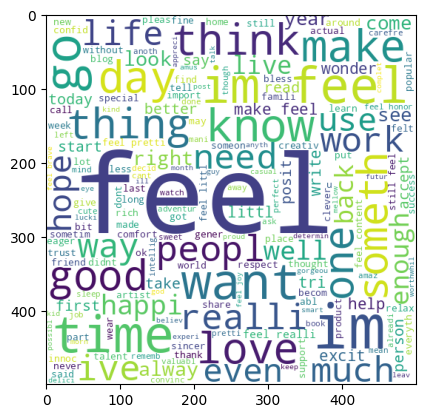

In [ ]:
joy_wc=wc.generate(data[data["Emotion"]==2]["final_data"].str.cat(sep=" "))
plt.imshow(joy_wc)

In [ ]:
#words used in anger
anger_corpus=[]
for msg in data[data["Emotion"]==0]["final_data"].tolist():
    for word in msg.split():
        anger_corpus.append(word)

In [ ]:
len(anger_corpus)

18570

- top 50 words which are used in anger emotion

In [ ]:
from collections import Counter
pd.DataFrame(Counter(anger_corpus).most_common(50))

,0,1
0,feel,2096
1,like,362
2,im,321
3,get,165
4,time,131
5,want,125
6,irrit,119
7,know,113
8,realli,113
9,hate,106


In [ ]:
#words used in fear
fear_corpus=[]
for msg in data[data["Emotion"]==1]["final_data"].tolist():
    for word in msg.split():
        fear_corpus.append(word)

In [ ]:
len(fear_corpus)

17816

In [ ]:
fear_corpus

['serious',
 'hate',
 'one',
 'subject',
 'death',
 'feel',
 'reluct',
 'drop',
 'sit',
 'write',
 'start',
 'dig',
 'feel',
 'think',
 'afraid',
 'accept',
 'possibl',
 'might',
 'make',
 'feel',
 'suspici',
 'one',
 'outsid',
 'like',
 'raptur',
 'happen',
 'someth',
 'bitten',
 'dog',
 'feel',
 'like',
 'redeem',
 'even',
 'though',
 'think',
 'realiz',
 'distraught',
 'ok',
 'hope',
 'next',
 'quot',
 'abl',
 'let',
 'special',
 'someon',
 'know',
 'im',
 'feel',
 'insecur',
 'understand',
 'matter',
 'much',
 'trust',
 'still',
 'feel',
 'littl',
 'shaki',
 'time',
 'move',
 'slightli',
 'odd',
 'jade',
 'hair',
 'particular',
 'seem',
 'prone',
 'gener',
 'work',
 'well',
 'spencer',
 'write',
 'im',
 'feel',
 'deepli',
 'overwhelm',
 'ordinari',
 'task',
 'feel',
 'heart',
 'shaki',
 'time',
 'im',
 'still',
 'feel',
 'indecis',
 'im',
 'poll',
 'yall',
 'p',
 'confess',
 'feel',
 'nervou',
 'made',
 'way',
 'event',
 'venu',
 'realli',
 'worri',
 'would',
 'feel',
 'intimid',
 

- top 50 words used in fear emotion

In [ ]:
pd.DataFrame(Counter(fear_corpus).most_common(50))

,0,1
0,feel,2025
1,im,322
2,like,264
3,littl,149
4,go,139
5,know,136
6,bit,118
7,want,113
8,time,110
9,get,107


In [ ]:
#words used in joy
joy_corpus=[]
for msg in data[data["Emotion"]==2]["final_data"].tolist():
    for word in msg.split():
        joy_corpus.append(word)

In [ ]:
len(joy_corpus)

19275

- top 50 words used in joy enotion

In [ ]:
pd.DataFrame(Counter(joy_corpus).most_common(50))

,0,1
0,feel,2112
1,like,387
2,im,300
3,make,140
4,get,130
5,want,120
6,time,119
7,go,113
8,realli,110
9,know,99


** Data transformation**
- using count vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #importing countvector
cvector=CountVectorizer()

In [ ]:
x=cvector.fit_transform(data["final_data"]).toarray() #applying vectorization to data

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=data["Emotion"].values

In [ ]:
y

array([1, 0, 1, ..., 2, 1, 0])

# seperating training and testing data

In [ ]:
#importing traintest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3) # 20% data will used for testing

# model initialisation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score #imprting classification metrics
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn.svm import SVC #importing Support vector classifier
from sklearn.tree import DecisionTreeClassifier #importing Decision tree classifier
from sklearn.ensemble import RandomForestClassifier #importing Random forest
from sklearn.naive_bayes import MultinomialNB   #importing multinomial naive bayes
from sklearn.neighbors import KNeighborsClassifier  #importing KNN
from sklearn.ensemble import AdaBoostClassifier #importing Adaboost classifier
from sklearn.ensemble import BaggingClassifier  #importing bagging classifier
from sklearn.ensemble import GradientBoostingClassifier #importing GB classifier
from xgboost import XGBClassifier   #importing XGB classifier

# Logistic regression

In [ ]:
log_reg=LogisticRegression()    #assigning model
log_reg.fit(x_train,y_train)    #model training
y_log_pred=log_reg.predict(x_test)  #predicting on test data
yt_log_pred=log_reg.predict(x_train)    #predicting on train data
log_reg_acc=accuracy_score(y_test,y_log_pred)   #accuracy on test data
log_reg_prec=precision_score(y_test,y_log_pred,average='macro') #precision on test data

tr_log_reg_acc=accuracy_score(y_train,yt_log_pred)  #accuracy on test data
tr_log_reg_prec=precision_score(y_train,yt_log_pred,average='macro') #precision on test data

#printing accuracy and precision
print("accuracy score on train data is ",tr_log_reg_acc)
print("precision score on train data is ",tr_log_reg_prec)
print("accuracy score on test data is ",log_reg_acc)
print("precision score on test data is ",log_reg_prec)

accuracy score on train data is  0.9919983154348284
precision score on train data is  0.991995791449933
accuracy score on test data is  0.9225589225589226
precision score on test data is  0.9226309573657144


# Support vector classifier

In [ ]:
sv=SVC()   #assigning model
sv.fit(x_train,y_train) #model training
sv_pred=sv.predict(x_test)  #predicting on test data
svt_pred=sv.predict(x_train)    #predicting on train data
sv_acc=accuracy_score(y_test,sv_pred)   #accuracy score on test data
sv_prec=precision_score(y_test,sv_pred,average='macro') #precision on test data
svt_acc=accuracy_score(y_train,svt_pred)    #accuracy on train data
svt_prec=precision_score(y_train,svt_pred,average='macro')  #precision on train data

#printing accuracy and precision
print("accuracy score on train datais ",svt_acc)
print("precision score on train data is ",svt_prec)
print("accuracy score on test data is ",sv_acc)
print("precision score on test data is ",sv_prec)

accuracy score on train datais  0.9894714676774058
precision score on train data is  0.9896740968685487
accuracy score on test data is  0.9057239057239057
precision score on test data is  0.9082367038796687


# Decision tree Classifier

In [ ]:
dec_tree=DecisionTreeClassifier()   #assigning model
dec_tree.fit(x_train,y_train)   #model training
dec_tree_pred=dec_tree.predict(x_test)  #prediction on test data
dec_tree_tr_pred=dec_tree.predict(x_train)  #prediction on train data

dec_tree_acc=accuracy_score(y_test,dec_tree_pred)   #accuracy of test data
dec_tree_prec=precision_score(y_test,dec_tree_pred,average='macro') #precision of test data
dec_tree_tr_acc=accuracy_score(y_train,dec_tree_tr_pred)    #accuracy of train data
dec_tree_tr_prec=precision_score(y_train,dec_tree_tr_pred,average='macro')  #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",dec_tree_tr_acc)
print("precision score on train data is ",dec_tree_tr_prec)
print("accuracy score on test data is ",dec_tree_acc)
print("precision score on test data is ",dec_tree_prec)



accuracy score on train data is  0.9991577174141925
precision score on train data is  0.9991744066047472
accuracy score on test data is  0.9284511784511784
precision score on test data is  0.9300199258661005


# Random forest classifier

In [ ]:
rfcl_model=RandomForestClassifier() #assigning model
rfcl_model.fit(x_train,y_train) #model training
rfcl_pred_model=rfcl_model.predict(x_test)  #prediction on test data
rfcl_tr_pred_model=rfcl_model.predict(x_train)  #prediction on train data
rfcl_acc_model=accuracy_score(y_test,rfcl_pred_model)   #accuracy on test data
rfcl_prec_model=precision_score(y_test,rfcl_pred_model,average='macro') #precision on test data
rfcl_tr_acc_model=accuracy_score(y_train,rfcl_tr_pred_model)    #accuracy on train data
rfcl_tr_prec_model=precision_score(y_train,rfcl_tr_pred_model,average='macro')  #precision on train data
#printing accuracy and precision

print("accuracy score on train data  is ",rfcl_tr_acc_model)
print("precision score on train data  is ",rfcl_tr_prec_model)
print("accuracy score on test data is ",rfcl_acc_model)
print("precision score on test data  is ",rfcl_prec_model)


accuracy score on train data  is  0.9991577174141925
precision score on train data  is  0.999162881931753
accuracy score on test data is  0.9217171717171717
precision score on test data  is  0.9236440128176344


# Naive Bayes classifier

- MNB

In [ ]:
mnb=MultinomialNB() #assigning model
mnb.fit(x_train,y_train)    #model training
mnb_pred=mnb.predict(x_test)    #prediction on test data
mnb_tr_pred=mnb.predict(x_train)    #prediction on train data
mnb_acc=accuracy_score(y_test,mnb_pred) #accuracy on test data
mnb_prec=precision_score(y_test,mnb_pred,average='macro')   #precision on test data
mnb_tr_acc=accuracy_score(y_train,mnb_tr_pred)  #accuracy on train data
mnb_tr_prec=precision_score(y_train,mnb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",mnb_tr_acc)
print("precision score on train data is ",mnb_tr_prec)
print("accuracy score on test data is ",mnb_acc)
print("precision score on test data is ",mnb_prec)



accuracy score on train data is  0.9768372288902927
precision score on train data is  0.9769514431786931
accuracy score on test data is  0.8888888888888888
precision score on test data is  0.8908710898224662


# XGboost classifier

In [ ]:
xgb=XGBClassifier() #assigning model
xgb.fit(x_train,y_train)    #model training
xgb_pred=xgb.predict(x_test)    #prediction on test data
xgb_tr_pred=xgb.predict(x_train)    #prediction on train data
xgb_acc=accuracy_score(y_test,xgb_pred) #accuracy on test data
xgb_prec=precision_score(y_test,xgb_pred,average='macro')   #precision on test data
xgb_tr_acc=accuracy_score(y_train,xgb_tr_pred)  #accuracy on train data
xgb_tr_prec=precision_score(y_train,xgb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",xgb_tr_acc)
print("precision score on train data is ",xgb_tr_prec)
print("accuracy score on test data is ",xgb_acc)
print("precision score on test data is ",xgb_prec)



accuracy score on train data is  0.9633607075173721
precision score on train data is  0.9645737255935662
accuracy score on test data is  0.9158249158249159
precision score on test data is  0.9180274325919316


# Adaboost

In [ ]:
adb=AdaBoostClassifier()    #assigning model
adb.fit(x_train,y_train)    #model training
adb_pred=adb.predict(x_test)    #prediction on test data
adb_tr_pred=adb.predict(x_train)    #prediction on train data
adb_acc=accuracy_score(y_test,adb_pred) #accuracy on test data
adb_prec=precision_score(y_test,adb_pred,average='macro')   #precision on test data
adb_tr_acc=accuracy_score(y_train,adb_tr_pred)  #accuracy on train data
adb_tr_prec=precision_score(y_train,adb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",adb_tr_acc)
print("precision score on train data is ",adb_tr_prec)
print("accuracy score on test data is ",adb_acc)
print("precision score on test data is ",adb_prec)


accuracy score on train data is  0.6081280269530428
precision score on train data is  0.6443241454560066
accuracy score on test data is  0.5858585858585859
precision score on test data is  0.6011900198726416


# Gradient Boost

In [ ]:
gbc=GradientBoostingClassifier()    #assigning model
gbc.fit(x_train,y_train)    #model training
gbc_pred=gbc.predict(x_test)    #prediction on test data
gbc_tr_pred=gbc.predict(x_train)    #prediction on train data
gbc_acc=accuracy_score(y_test,gbc_pred) #accuracy on test data
gbc_prec=precision_score(y_test,gbc_pred,average='macro')   #precision on test data
gbc_tr_acc=accuracy_score(y_train,gbc_tr_pred)  #accuracy on train data
gbc_tr_prec=precision_score(y_train,gbc_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",gbc_tr_acc)
print("precision score on train data is ",gbc_tr_prec)
print("accuracy score on test data is ",gbc_acc)
print("precision score on test data is ",gbc_prec)


accuracy score on train data is  0.9359865234786271
precision score on train data is  0.9388411566926195
accuracy score on test data is  0.8880471380471381
precision score on test data is  0.8909753318629837


# Bagging Classifer

In [ ]:
bagc=BaggingClassifier()    #assigning model
bagc.fit(x_train,y_train)   #model training
bagc_pred=bagc.predict(x_test)  #prediction on test
bagc_tr_pred=bagc.predict(x_train)  #prediction on train data
bagc_acc=accuracy_score(y_test,bagc_pred)   #accuracy on test data
bagc_prec=precision_score(y_test,bagc_pred,average='macro') #precision on test data
bagc_tr_acc=accuracy_score(y_train,bagc_tr_pred)    #accuracy on train data
bagc_tr_prec=precision_score(y_train,bagc_tr_pred,average='macro')  #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",bagc_tr_acc)
print("precision score on train data is ",bagc_tr_prec)
print("accuracy score on test data is ",bagc_acc)
print("precision score on test data is ",bagc_prec)


accuracy score on train data is  0.990945462202569
precision score on train data is  0.9910534220408834
accuracy score on test data is  0.9301346801346801
precision score on test data is  0.9322192870966934


# KNN classifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5) #assigning model
knn.fit(x_train,y_train)    #training of model
knn_pred=knn.predict(x_test)    #prediction on test data
knn_tr_pred=knn.predict(x_train)    #prediction on train data
knn_acc=accuracy_score(y_test,knn_pred) #accuracy score on test data
knn_prec=precision_score(y_test,knn_pred,average='macro')   #precision on test data
knn_tr_acc=accuracy_score(y_train,knn_tr_pred)  #accuracy on train data
knn_tr_prec=precision_score(y_train,knn_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",knn_tr_acc)
print("precision score on train data is ",knn_tr_prec)
print("accuracy score on test data is ",knn_acc)
print("precision score on test data is ",knn_prec)


accuracy score on train data is  0.8026953042745841
precision score on train data is  0.8239514197278949
accuracy score on test data is  0.6632996632996633
precision score on test data is  0.7032963022958322


# DataFrame to show performance metrics

In [ ]:
pd.DataFrame({"model_name":["logistic_regression","support_vector_classifier","decision_tree","random_forest","multinomial_NB","xgboost","adaboost","gradientboost","bagging","knn"],
              "train_precision_score":[tr_log_reg_prec,svt_prec,dec_tree_tr_prec,rfcl_tr_prec_model,mnb_tr_prec,xgb_tr_prec,adb_tr_prec,gbc_tr_prec,bagc_tr_prec,knn_tr_prec],
              "test_precision_score":[log_reg_prec,sv_prec,dec_tree_prec,rfcl_prec_model,mnb_prec,xgb_prec,adb_prec,gbc_prec,bagc_prec,knn_prec],
              "train_accuracy_score":[tr_log_reg_acc,svt_acc,dec_tree_tr_acc,rfcl_tr_acc_model,mnb_tr_acc,xgb_tr_acc,adb_tr_acc,gbc_tr_acc,bagc_tr_acc,knn_tr_acc],
              "test_accuracy_score":[log_reg_acc,sv_acc,dec_tree_acc,rfcl_acc_model,mnb_acc,xgb_acc,adb_acc,gbc_acc,bagc_acc,knn_acc]
              })

,model_name,train_precision_score,test_precision_score,train_accuracy_score,test_accuracy_score
0,logistic_regression,0.991996,0.922631,0.991998,0.922559
1,support_vector_classifier,0.989674,0.908237,0.989471,0.905724
2,decision_tree,0.999174,0.930020,0.999158,0.928451
3,random_forest,0.999163,0.923644,0.999158,0.921717
4,multinomial_NB,0.976951,0.890871,0.976837,0.888889
5,xgboost,0.964574,0.918027,0.963361,0.915825
6,adaboost,0.644324,0.601190,0.608128,0.585859
7,gradientboost,0.938841,0.890975,0.935987,0.888047
8,bagging,0.991053,0.932219,0.990945,0.930135
9,knn,0.823951,0.703296,0.802695,0.663300


# Decision tree model performing well but it can lead overfitting in data, we can consider Bagging and Random forest classifier as they are giving best result as precision and accuracy score is well balanced.

# testing of new data

In [ ]:
#'bagc' is BaggingClassifier model

# user text
user_text = "i hope that the next quote will be able to let my special someone knows what im feeling insecure about and understand that no matter how much i trust"
# Transform the given text
transformed_user_data = transformed_text(user_text)
# Vectorize the transformed text
text_vectorized = cvector.transform([transformed_user_data]).toarray()

#predictions using the model
prediction = bagc.predict(text_vectorized)

# Print the prediction
if prediction==0:
    print("emotion is anger")
elif prediction==1:
    print("emotion is fear")
else:
    print("emotion is joy")

emotion is fear
